In [32]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from tabulate import tabulate
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE 


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, log_loss, r2_score, mean_absolute_error, mean_squared_error, confusion_matrix

sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# Load datasets

path = r'datasets_case_3/2_dataset_after_resampling.csv'
df = pd.read_csv(path, low_memory=False)


In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact_type,month,day_of_week,...,previous_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor3m,number_of_employees,y,has_term_deposit,age_band,new_passed_days
0,56,3,1,2,0,0,0,1,6,1,...,1,1.1,93.994,-36.4,4.857,5191.0,0,0,4,0
1,57,8,1,0,1,0,0,1,6,1,...,1,1.1,93.994,-36.4,4.857,5191.0,0,0,4,0
2,37,8,1,0,0,2,0,1,6,1,...,1,1.1,93.994,-36.4,4.857,5191.0,0,0,2,0
3,40,0,1,4,0,0,0,1,6,1,...,1,1.1,93.994,-36.4,4.857,5191.0,0,0,2,0
4,56,8,1,0,0,0,2,1,6,1,...,1,1.1,93.994,-36.4,4.857,5191.0,0,0,4,0


In [4]:
df.isnull().sum()

age                          0
job                          0
marital                      0
education                    0
default                      0
housing                      0
loan                         0
contact_type                 0
month                        0
day_of_week                  0
last_contact_duration        0
campaign                     0
passed_days                  0
previous                     0
previous_outcome             0
employment_variation_rate    0
consumer_price_index         0
consumer_confidence_index    0
euribor3m                    0
number_of_employees          0
y                            0
has_term_deposit             0
age_band                     0
new_passed_days              0
dtype: int64

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact_type', 'month', 'day_of_week', 'last_contact_duration',
       'campaign', 'passed_days', 'previous', 'previous_outcome',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euribor3m', 'number_of_employees', 'y',
       'has_term_deposit', 'age_band', 'new_passed_days'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41176 non-null  int64  
 1   job                        41176 non-null  int64  
 2   marital                    41176 non-null  int64  
 3   education                  41176 non-null  int64  
 4   default                    41176 non-null  int64  
 5   housing                    41176 non-null  int64  
 6   loan                       41176 non-null  int64  
 7   contact_type               41176 non-null  int64  
 8   month                      41176 non-null  int64  
 9   day_of_week                41176 non-null  int64  
 10  last_contact_duration      41176 non-null  int64  
 11  campaign                   41176 non-null  int64  
 12  passed_days                41176 non-null  int64  
 13  previous                   41176 non-null  int

In [9]:
df.duplicated().sum()


1

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,39.659413,9.739905,17.000,32.000,38.000,47.000,71.000
job,41176.0,4.058214,3.986478,0.000,0.000,2.000,8.000,11.000
marital,41176.0,1.451647,1.016533,0.000,1.000,1.000,3.000,3.000
education,41176.0,4.136924,2.739054,0.000,2.000,5.000,7.000,7.000
default,41176.0,0.208908,0.406713,0.000,0.000,0.000,0.000,2.000
housing,41176.0,1.071789,0.985305,0.000,0.000,2.000,2.000,2.000
loan,41176.0,0.327521,0.723700,0.000,0.000,0.000,0.000,2.000
contact_type,41176.0,0.365286,0.481516,0.000,0.000,0.000,1.000,1.000
month,41176.0,4.231033,2.319973,0.000,3.000,4.000,6.000,9.000
day_of_week,41176.0,2.004614,1.397692,0.000,1.000,2.000,3.000,4.000


In [11]:
# Split the Data into Training and Testing Sets
X = df.drop(['has_term_deposit', 'y'], axis=1)
y = df['has_term_deposit']


In [12]:
# To see all the variables created globally across the notebook.
%whos


Variable                  Type         Data/Info
------------------------------------------------
DecisionTreeClassifier    ABCMeta      <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
KNeighborsClassifier      ABCMeta      <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
LabelEncoder              type         <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
LogisticRegression        type         <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
RandomForestClassifier    ABCMeta      <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
SMOTE                     ABCMeta      <class 'imblearn.over_sam<...>pling._smote.base.SMOTE'>
SVC                       ABCMeta      <class 'sklearn.svm._classes.SVC'>
StandardScaler            type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                         DataFrame           age  job  marital <...>[41176 rows x 22 columns]
accuracy_score            function     <function accuracy_score at 0

In [13]:
# Create a scaler
sc = StandardScaler()
sc.fit_transform(X)


array([[ 1.67771497, -0.26545394, -0.44430646, ...,  0.33169507,
         1.44946708, -0.19544496],
       [ 1.78038661,  0.98880117, -0.44430646, ...,  0.33169507,
         1.44946708, -0.19544496],
       [-0.27304634,  0.98880117, -0.44430646, ...,  0.33169507,
        -0.42086577, -0.19544496],
       ...,
       [ 1.67771497,  0.48709912, -0.44430646, ..., -2.81568858,
         1.44946708, -0.19544496],
       [ 0.44565519,  1.49050321, -0.44430646, ..., -2.81568858,
         0.51430065, -0.19544496],
       [-0.17037469,  0.48709912, -0.44430646, ..., -2.81568858,
         3.31979994, -0.19544496]])

In [18]:
# Dataset splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [19]:
X_train.head()


,age,job,marital,education,default,housing,loan,contact_type,month,day_of_week,...,passed_days,previous,previous_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor3m,number_of_employees,age_band,new_passed_days
12346,29,2,1,4,0,2,2,1,3,0,...,-1,0,1,1.4,93.918,-42.7,4.959,5228.1,1,0
8564,50,0,3,7,0,0,0,1,4,4,...,-1,0,1,1.4,94.465,-41.8,4.864,5228.1,3,0
21417,29,0,3,7,0,0,0,0,1,3,...,-1,0,1,1.4,93.444,-36.1,4.963,5228.1,1,0
3315,35,0,3,7,0,0,0,1,6,2,...,-1,0,1,1.1,93.994,-36.4,4.860,5191.0,2,0
33236,40,1,3,0,1,0,0,0,6,3,...,-1,0,1,-1.8,92.893,-46.2,1.291,5099.1,2,0


In [20]:
X_train.shape


(32940, 22)

In [21]:
X_test.head()


,age,job,marital,education,default,housing,loan,contact_type,month,day_of_week,...,passed_days,previous,previous_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor3m,number_of_employees,age_band,new_passed_days
36254,59,6,1,5,0,2,2,0,4,1,...,-1,0,1,-2.9,92.963,-40.8,1.266,5076.2,4,0
32662,34,1,1,6,0,0,0,0,6,1,...,-1,1,0,-1.8,92.893,-46.2,1.299,5099.1,2,0
40860,32,10,1,5,0,2,0,0,8,4,...,-1,0,1,-1.1,94.601,-49.5,0.959,4963.6,2,0
32897,53,0,1,0,0,2,2,0,6,1,...,-1,1,0,-1.8,92.893,-46.2,1.299,5099.1,4,0
16461,24,8,3,6,0,2,0,1,3,4,...,-1,0,1,1.4,93.918,-42.7,4.963,5228.1,1,0


In [22]:
X_test.shape


(8236, 22)

In [26]:
y_train.head()


12346    0
8564     0
21417    0
3315     0
33236    0
Name: has_term_deposit, dtype: int64

In [27]:
y_train.shape


(32940,)

In [28]:
y_test.head()


36254    1
32662    0
40860    1
32897    0
16461    0
Name: has_term_deposit, dtype: int64

In [29]:
y_test.shape

(8236,)

In [30]:
def calc_popularity(y_actual):
    return (sum(y_actual)/len(y_actual))


In [31]:
# Calculates specificity
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)


In [33]:
# Evaluation of model performance
def print_report(y_actual, y_pred, thresh):
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    f1 = 2 * (precision * recall) / (precision + recall)
    logloss = log_loss(y_actual, y_pred)
    r_squared = r2_score(y_actual, y_pred)
    mae = mean_absolute_error(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    rmse = np.sqrt(mse)
    

    tn, fp, fn, tp = confusion_matrix(y_actual, (y_pred > thresh)).ravel()

    print('AUC: %.3f' % auc)
    print('Accuracy: %.3f' % accuracy)
    print('Recall: %.3f' % recall)
    print('Precision: %.3f' % precision)
    print('Specificity: %.3f' % specificity)
    print('Popularity: %.3f' % calc_popularity(y_actual))
    print('F1: %.3f' % f1)
    print('Log Loss: %.3f' % logloss)
    print('R-squared: %.3f' % r_squared)
    print('MAE: %.3f' % mae)
    print('MSE: %.3f' % mse)
    print('RMSE: %.3f' % rmse)
    

    print('-'*20)
    confusion_matrix_table = tabulate([['True Negative', tn], ['False Positive', fp], ['False Negative', fn], ['True Positive', tp]],
                                     headers=['Metric', 'Value'], tablefmt='grid')
    print('---------- Confusion Matrix ----------\n')
    print(confusion_matrix_table)

    print(' ')
    return auc, accuracy, recall, precision, specificity, f1, logloss, r_squared, mae, mse, rmse


### Model Selection
- Logistic regression.
- KNN - K Nearest Neighbors.
- Decision tree.
- Random forest.

In [34]:
# Logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [35]:
# Make predictions on the testing set
y_test_preds = lr.predict_proba(X_test)[:, 1]

# Evaluate the model
print('=' * 47)
print('======== Logistic Regression ========')
print('=' * 47)

thresh = 0.5 

lr_test_auc, lr_test_accuracy, lr_test_recall, lr_test_precision, lr_test_specificity, lr_test_f1, lr_test_log_loss, \
    lr_test_r_squared, lr_test_mae, lr_test_mse, lr_test_rmse = print_report(y_test, y_test_preds, thresh)

======== Logistic Regression Testing ========
AUC: 0.871
Accuracy: 0.898
Recall: 0.287
Precision: 0.653
Specificity: 0.980
Popularity: 0.118
F1: 0.399
Log Loss: 0.251
R-squared: 0.287
MAE: 0.145
MSE: 0.074
RMSE: 0.272
--------------------
---------- Confusion Matrix ----------

+----------------+---------+
| Metric         |   Value |
+================+=========+
| True Negative  |    7117 |
+----------------+---------+
| False Positive |     148 |
+----------------+---------+
| False Negative |     692 |
+----------------+---------+
| True Positive  |     279 |
+----------------+---------+
 


In [36]:

y_test_binary_preds = (y_test_preds >= thresh).astype(int)

# Create a DataFrame with actual and predicted labels
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_binary_preds
})

# Create a crosstab table
crosstab_table = pd.crosstab(df['Actual'], df['Predicted'], margins=True)
crosstab_table


Predicted,0,1,All
Actual,,,
0,7117,148,7265
1,692,279,971
All,7809,427,8236


In [37]:
# KNN - K Nearest Neighbors.
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [38]:
# Make predictions on the testing set
y_test_preds_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluate the KNN model
print('=' * 47)
print('======== K Nearest Neighbors ========')
print('=' * 47)

thresh = 0.5

knn_test_auc, knn_test_accuracy, knn_test_recall, \
    knn_test_precision, knn_test_specificity, knn_test_f1, knn_test_log_loss, knn_test_r_squared, knn_test_mae, knn_test_mse, knn_test_rmse  = print_report(y_test, y_test_preds_knn, thresh)


======== K Nearest Neighbors Testing ========
AUC: 0.858
Accuracy: 0.894
Recall: 0.423
Precision: 0.566
Specificity: 0.957
Popularity: 0.118
F1: 0.484
Log Loss: 0.949
R-squared: 0.264
MAE: 0.126
MSE: 0.077
RMSE: 0.277
--------------------
---------- Confusion Matrix ----------

+----------------+---------+
| Metric         |   Value |
+================+=========+
| True Negative  |    6950 |
+----------------+---------+
| False Positive |     315 |
+----------------+---------+
| False Negative |     560 |
+----------------+---------+
| True Positive  |     411 |
+----------------+---------+
 


In [39]:
# Decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [40]:
# Make predictions on the testing set
y_test_preds_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluate the Decision Tree model
print('=' * 47)
print('======== Decision Tree ========')
print('=' * 47)

thresh = 0.5

dt_test_auc, dt_test_accuracy, dt_test_recall, \
    dt_test_precision, dt_test_specificity, dt_test_f1, dt_test_log_loss, dt_test_r_squared, dt_test_mae, dt_test_mse, dt_test_rmse  = print_report(y_test, y_test_preds_dt, thresh)


======== Decision Tree ========
AUC: 0.729
Accuracy: 0.885
Recall: 0.524
Precision: 0.513
Specificity: 0.933
Popularity: 0.118
F1: 0.518
Log Loss: 4.140
R-squared: -0.105
MAE: 0.115
MSE: 0.115
RMSE: 0.339
--------------------
---------- Confusion Matrix ----------

+----------------+---------+
| Metric         |   Value |
+================+=========+
| True Negative  |    6781 |
+----------------+---------+
| False Positive |     484 |
+----------------+---------+
| False Negative |     462 |
+----------------+---------+
| True Positive  |     509 |
+----------------+---------+
 


In [41]:
# Random forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [42]:
# Make predictions on the testing set
y_test_preds_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
print('=' * 47)
print('======== Random Forest ========')
print('=' * 47)

thresh = 0.5
rf_test_auc, rf_test_accuracy, rf_test_recall, \
    rf_test_precision, rf_test_specificity, rf_test_f1, rf_test_log_loss, rf_test_r_squared, rf_test_mae, rf_test_mse, rf_test_rmse  = print_report(y_test, y_test_preds_rf, thresh)


======== Random Forest ========
AUC: 0.936
Accuracy: 0.908
Recall: 0.432
Precision: 0.673
Specificity: 0.971
Popularity: 0.118
F1: 0.526
Log Loss: 0.208
R-squared: 0.409
MAE: 0.124
MSE: 0.061
RMSE: 0.248
--------------------
---------- Confusion Matrix ----------

+----------------+---------+
| Metric         |   Value |
+================+=========+
| True Negative  |    7061 |
+----------------+---------+
| False Positive |     204 |
+----------------+---------+
| False Negative |     552 |
+----------------+---------+
| True Positive  |     419 |
+----------------+---------+
 


### Analyze results

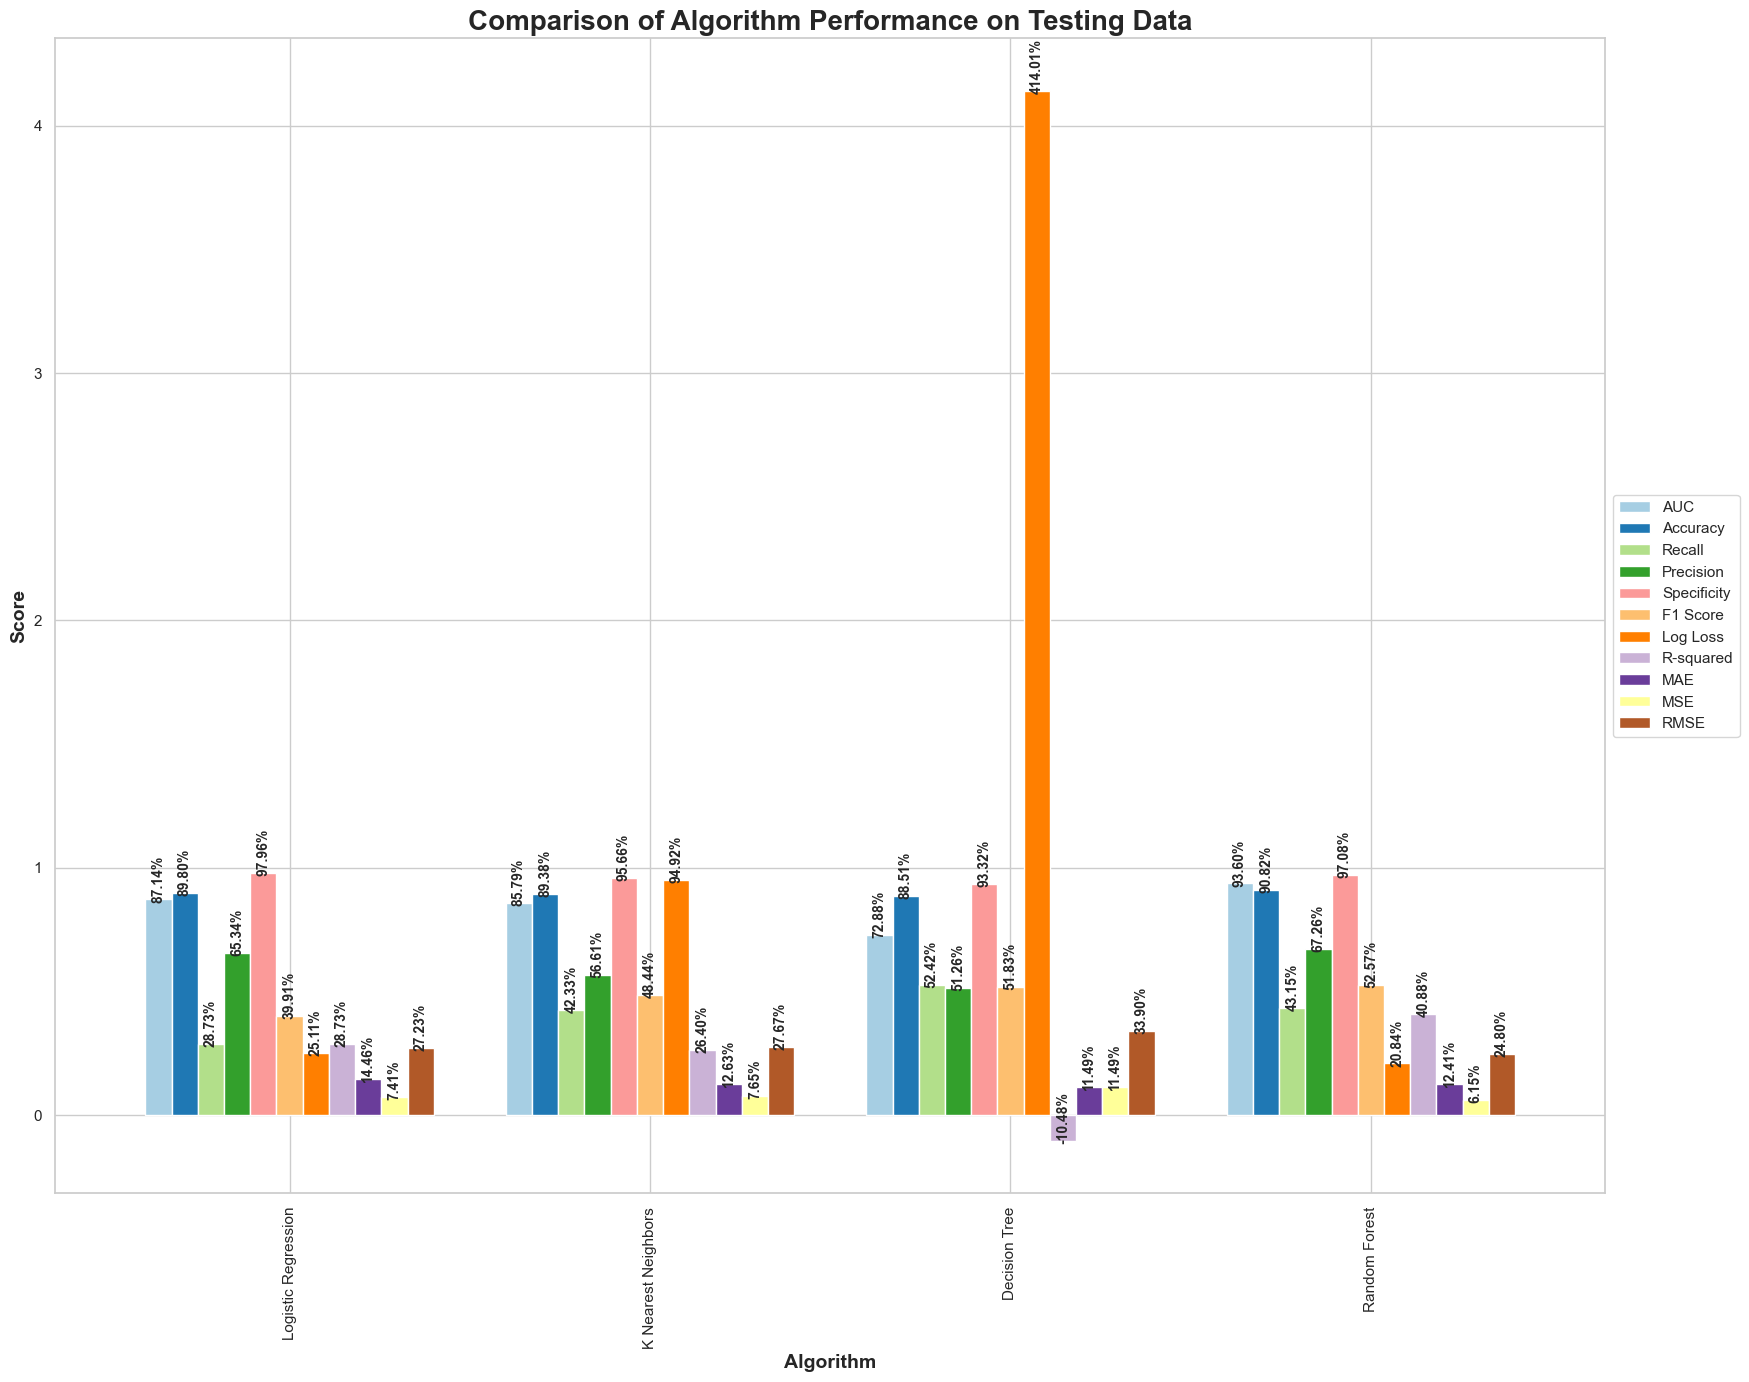

In [43]:
# Analyze results
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest'],
    'AUC': [lr_test_auc, knn_test_auc, dt_test_auc, rf_test_auc],
    'Accuracy': [lr_test_accuracy, knn_test_accuracy, dt_test_accuracy, rf_test_accuracy],
    'Recall': [lr_test_recall, knn_test_recall, dt_test_recall, rf_test_recall],
    'Precision': [lr_test_precision, knn_test_precision, dt_test_precision, rf_test_precision],
    'Specificity': [lr_test_specificity, knn_test_specificity, dt_test_specificity, rf_test_specificity],
    'F1 Score': [lr_test_f1, knn_test_f1, dt_test_f1, rf_test_f1], 
    'Log Loss': [lr_test_log_loss, knn_test_log_loss, dt_test_log_loss, rf_test_log_loss], 
    'R-squared': [lr_test_r_squared, knn_test_r_squared, dt_test_r_squared, rf_test_r_squared], 
    'MAE': [lr_test_mae, knn_test_mae, dt_test_mae, rf_test_mae],
    'MSE': [lr_test_mse, knn_test_mse, dt_test_mse, rf_test_mse],
    'RMSE': [lr_test_rmse, knn_test_rmse, dt_test_rmse, rf_test_rmse]
})

# Set the Algorithm column as the index for better plotting
results_df.set_index('Algorithm', inplace=True)

# Plotting with customization
ax = results_df.plot(kind='bar', colormap='Paired', width=0.8, figsize=(20, 15))

# Add borders to the plot
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# Display percentage values on top of each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    offset = 0.01
    ax.annotate(f'{height:.2%}', (x + width/2, y + height), ha='center', fontsize=10, fontweight='bold', rotation=90)

plt.title('Comparison of Algorithm Performance on Testing Data', fontsize=20, fontweight='bold')
plt.xlabel('Algorithm', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

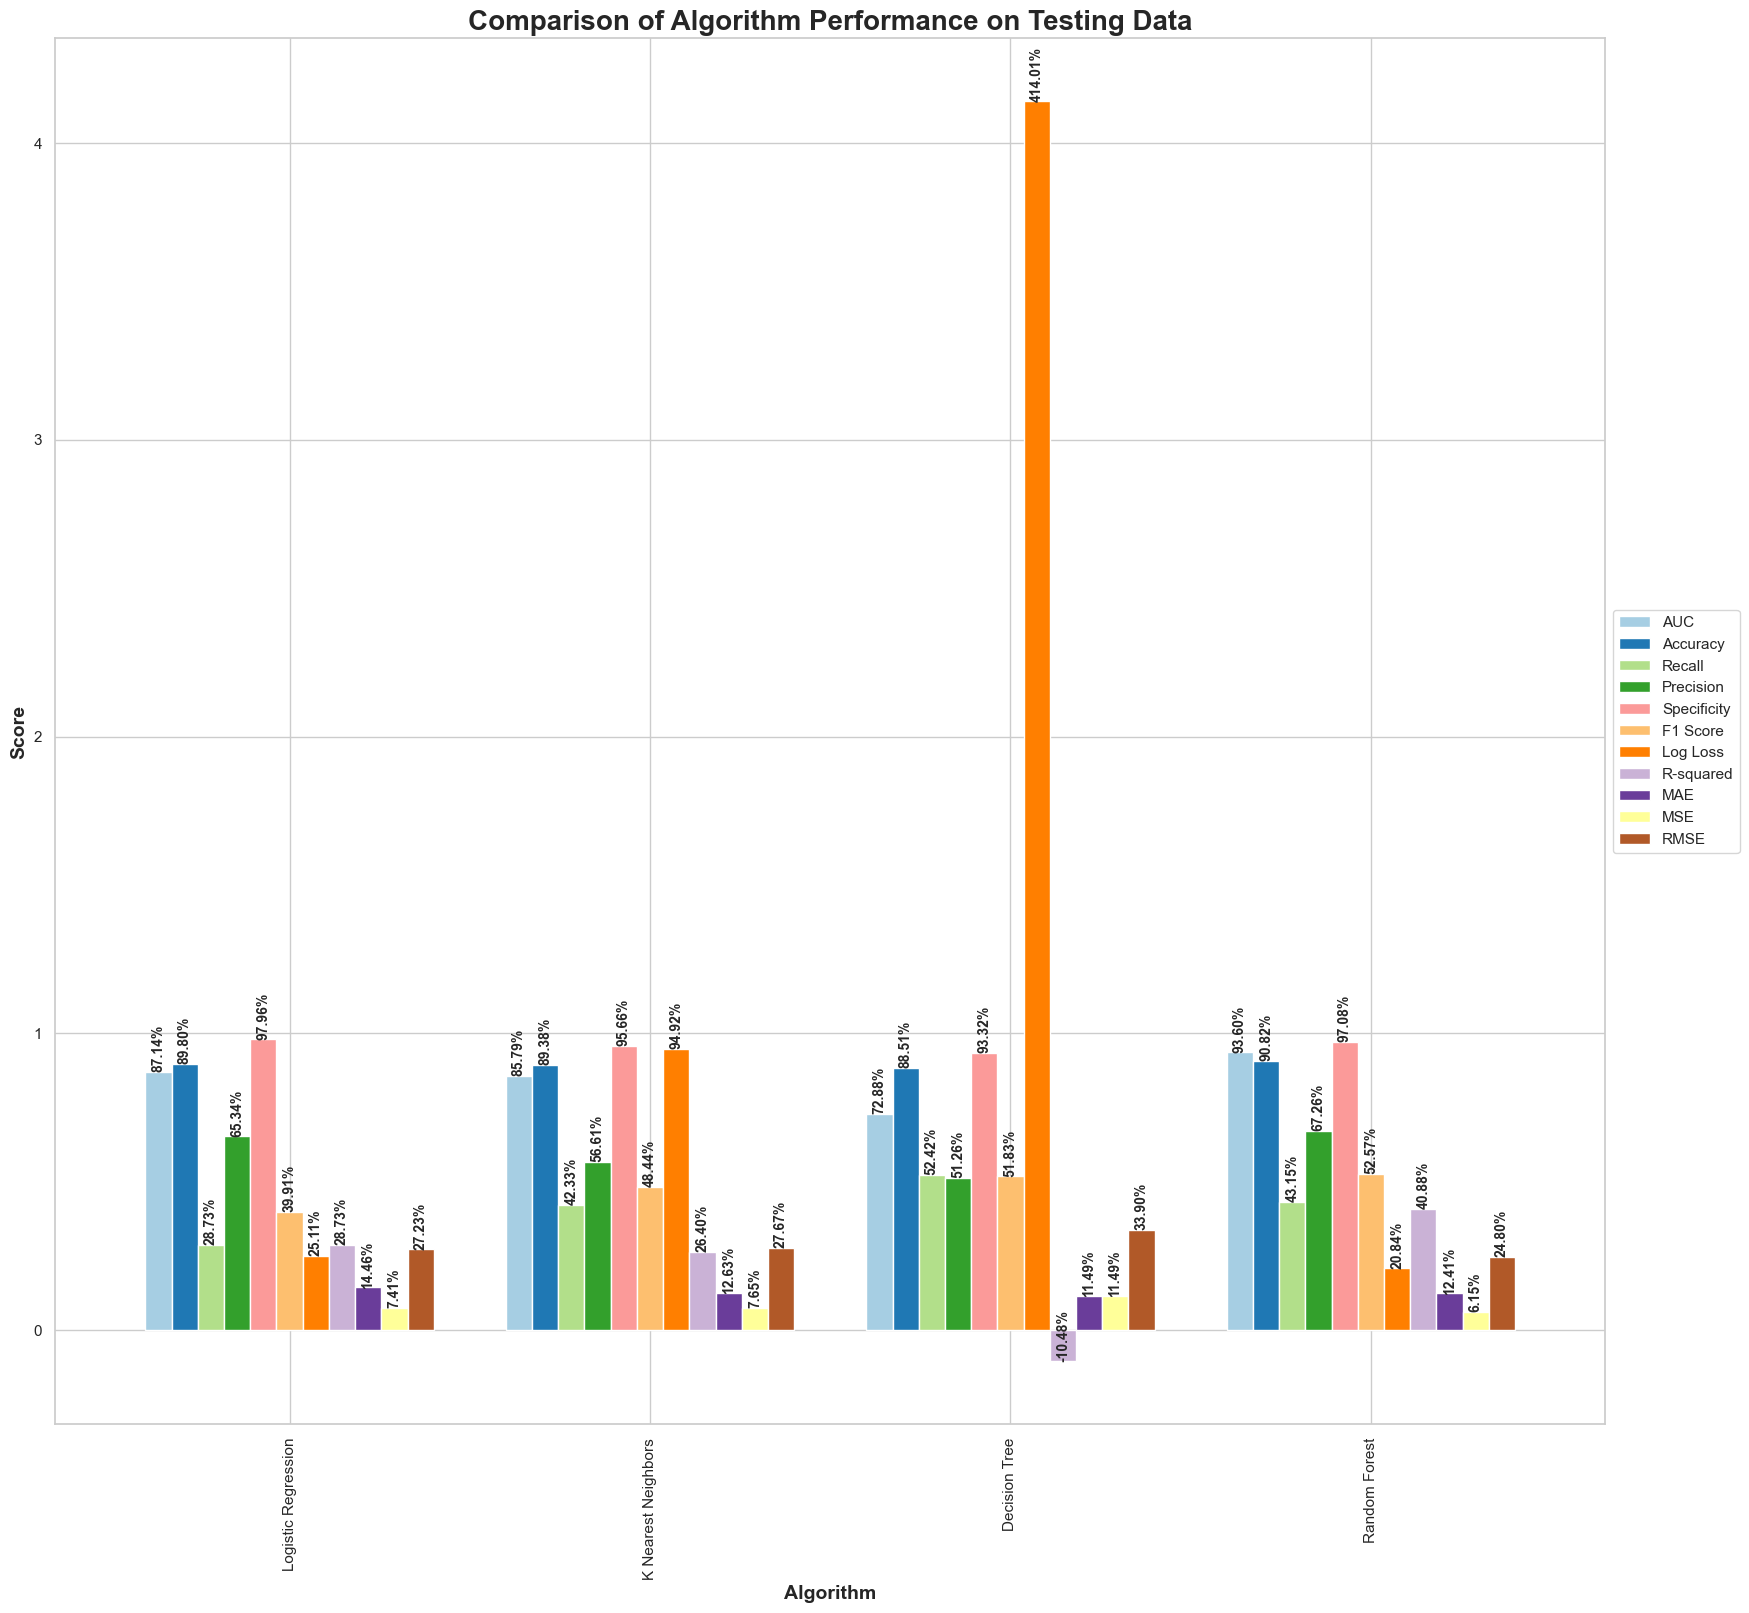

In [44]:
# Plotting with customization
ax = results_df.plot(kind='bar', colormap='Paired', width=0.8, figsize=(20, 18))

# Add borders to the plot
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# Display percentage values on top of each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    offset = 0.01
    ax.annotate(f'{height:.2%}', (x + width/2, y + height + offset), ha='center', fontsize=10, fontweight='bold', rotation=90)

plt.title('Comparison of Algorithm Performance on Testing Data', fontsize=20, fontweight='bold')
plt.xlabel('Algorithm', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [45]:
# Using Plotly

# Normalize the results_df to percentages
results_df_percentage = results_df.div(results_df.sum(axis=1), axis=0) * 100

# Create a bar plot using Plotly
fig = px.bar(results_df_percentage.reset_index(), 
             x='Algorithm', 
             y=['AUC', 'Accuracy', 'Recall', 'Precision', 'Specificity', 'F1 Score', 'R-squared', 'MAE', 'MSE', 'RMSE'],
             title='Comparison of Algorithm Performance on Testing Data',
             labels={'value': 'Percentage', 'variable': 'Metric'},
             barmode='group')

# Show the plot
fig.show()


### Feature Importance

In [46]:
def plot_feature_importance(model, feature_names, algorithm_name):
    if not hasattr(model, 'feature_importances_'):
        raise ValueError("The specified model does not support feature importances.")

    # Get feature importances from the model
    importances = model.feature_importances_

    # Create a DataFrame to store feature names and importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

    # Sort the DataFrame by importance in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(20, 10))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title(f'Feature Importance for {algorithm_name}', fontsize=20, fontweight='bold')
    plt.show()
    

In [47]:
def plot_feature_importance(model, feature_names, algorithm_name, palette, edgecolor):
    if not hasattr(model, 'feature_importances_'):
        raise ValueError("The specified model does not support feature importances.")

    # Get feature importances from the model
    importances = model.feature_importances_

    # Create a DataFrame to store feature names and importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

    # Sort the DataFrame by importance in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances
    plt.figure(figsize=(20, 10))
    sns.barplot(x='Feature', y='Importance', data=feature_importance_df, palette=palette, edgecolor=edgecolor)

    # Add percentage labels above each bar
    for i, val in enumerate(feature_importance_df['Importance']):
        plt.text(i, val + 0.005, f'{val*100:.2f}%', ha='center', fontsize=10, fontweight='bold', rotation='vertical')

    plt.title(f'Feature Importance for {algorithm_name}', fontsize=20, fontweight='bold')
    plt.xlabel('Feature', fontsize=12, fontweight='bold')
    plt.ylabel('Importance', fontsize=12, fontweight='bold')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()
    

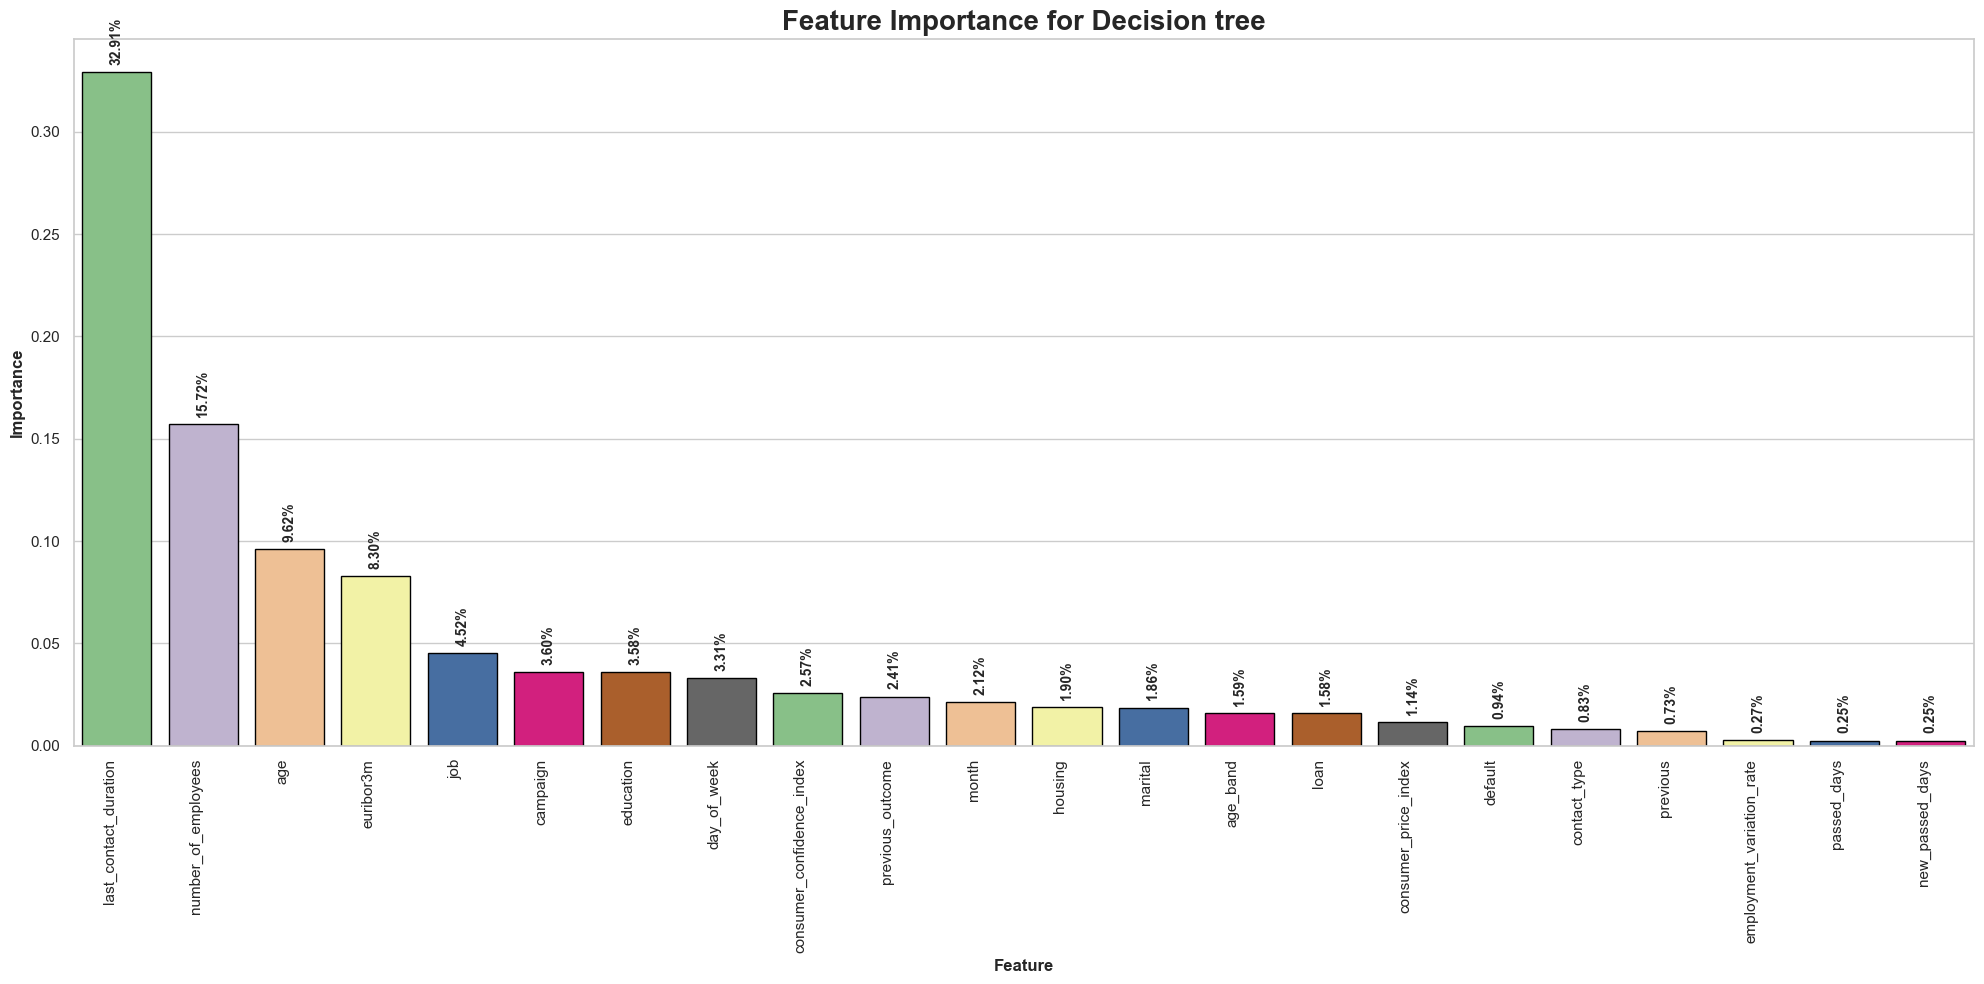

In [48]:
# Decision tree
feature_names = X_train.columns
plot_feature_importance(dt_model, feature_names, 'Decision tree', palette='Accent', edgecolor='black')


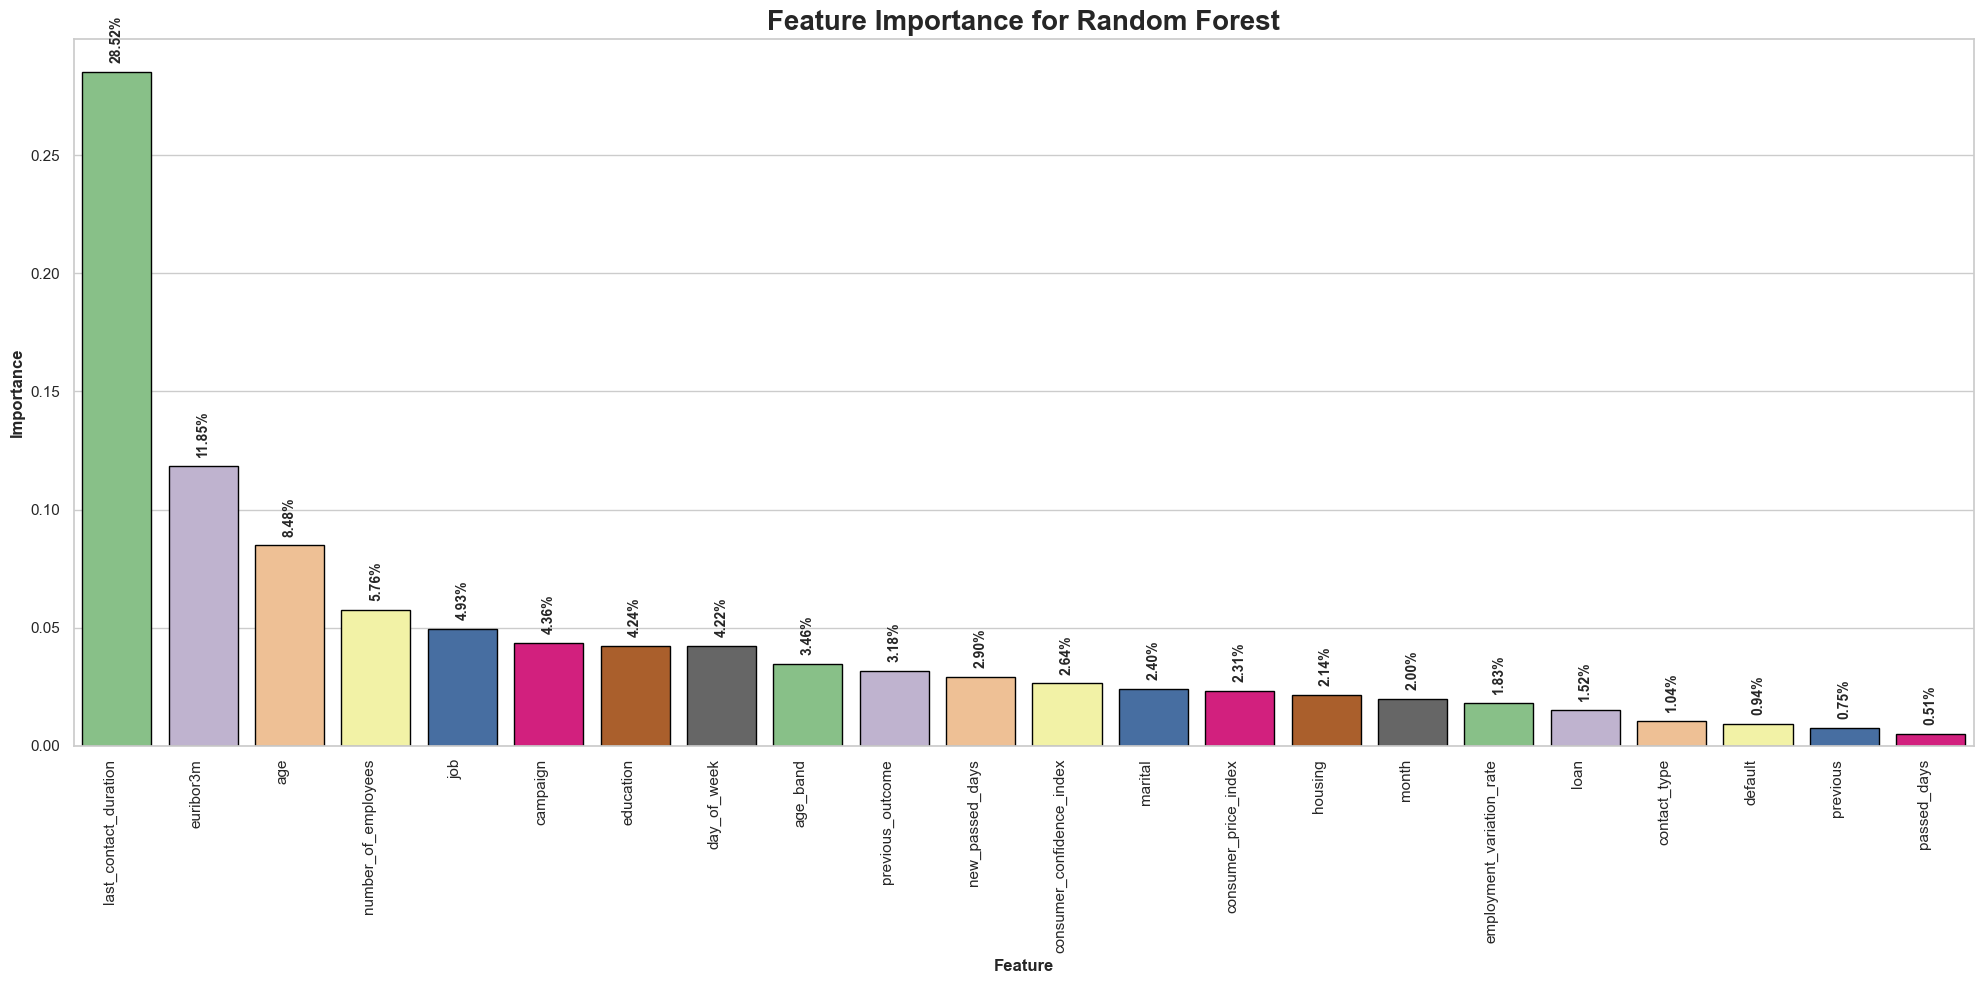

In [49]:
# Random Forest
feature_names = X_train.columns
plot_feature_importance(rf_model, feature_names, 'Random Forest', palette='Accent', edgecolor='black')
